# *Coustomer churn prediction*

#### Customer attrition (a.k.a customer churn) is one of the biggest expenditures of any organization. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold. Let’s make use of a customer transaction dataset from Kaggle to understand the key steps involved in predicting customer attrition in Python.
#### Supervised Machine Learning is nothing but learning a function that maps an input to an output based on example input-output pairs. A supervised machine learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. Given that we have data on current and prior customer transactions in the telecom dataset, this is a standardized supervised classification problem that tries to predict a binary outcome (Y/N).
#### By the end of this article, let’s attempt to solve some of the key business challenges pertaining to customer attrition like say, (1) what is the likelihood of an active customer leaving an organization? (2) what are key indicators of a customer churn? (3) what retention strategies can be implemented based on the results to diminish prospective customer churn?
#### In real-world, we need to go through seven major stages to successfully predict customer churn:

#### Section A: Data Preprocessing
#### Section B: Data Evaluation
#### Section C: Model Selection
#### Section D: Model Evaluation
#### Section E: Model Improvement
#### Section F: Future Predictions
#### Section G: Model Deployment

# Import libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns',None)

# Get the data

In [5]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [8]:
for i in df.columns:
    print(df[i].value_counts().to_frame())

            customerID
7563-BIUPC           1
3466-BYAVD           1
6522-OIQSX           1
5889-LFOLL           1
1442-BQPVU           1
...                ...
8406-LNMHF           1
0292-WEGCH           1
6773-LQTVT           1
3062-ICYZQ           1
2346-DJQTB           1

[7043 rows x 1 columns]
        gender
Male      3555
Female    3488
   SeniorCitizen
0           5901
1           1142
     Partner
No      3641
Yes     3402
     Dependents
No         4933
Yes        2110
    tenure
1      613
72     362
2      238
3      200
4      176
..     ...
28      57
39      56
44      51
36      50
0       11

[73 rows x 1 columns]
     PhoneService
Yes          6361
No            682
                  MultipleLines
No                         3390
Yes                        2971
No phone service            682
             InternetService
Fiber optic             3096
DSL                     2421
No                      1526
                     OnlineSecurity
No                         

In [60]:
df.isna().sum().to_frame('missing values')

missing values
customerID                     0
gender                         0
SeniorCitizen                  0
Partner                        0
Dependents                     0
tenure                         0
PhoneService                   0
MultipleLines                  0
InternetService                0
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
Contract                       0
PaperlessBilling               0
PaymentMethod                  0
MonthlyCharges                 0
TotalCharges                   0
Churn                          0

# Data Manipulation

#### (A)extract 5 column and store in c variable using iloc

In [10]:
c =df.iloc[0:,4]
print(c.head())

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object


#### (b)extract 5 column and store in d variable using loc

In [11]:
df.loc[:,['Dependents']].head()

Dependents
0         No
1         No
2         No
3         No
4         No

#### (c)extract all the male senior citizen whose payment method is elctronic check

In [12]:
df[(df['gender']=='Male') & (df['PaymentMethod']=='Electronic check')][['SeniorCitizen','gender','PaymentMethod']].head()

SeniorCitizen gender     PaymentMethod
14              0   Male  Electronic check
20              1   Male  Electronic check
26              0   Male  Electronic check
27              0   Male  Electronic check
36              0   Male  Electronic check

#### (d) extract all those customers whose tenure is greater than 70 moth "or" monthly charges more than 100$

In [13]:
df[(df['tenure']>70) | (df['MonthlyCharges']>100)][['tenure','MonthlyCharges']].head()

tenure  MonthlyCharges
8       28          104.80
12      58          100.35
13      49          103.70
14      25          105.50
15      69          113.25

#### (e) extract all those customers whose contract is 2  year and payment method is mailed check and  value of the churn is'Yes'

In [15]:
df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  \
268           Yes            No              No  No internet service   
5947          Yes           Yes              No  No internet service   
6680          Yes            No     Fiber optic                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
268   No internet service  No internet service  Two year               No   
5947  No internet service  No internet service  Two year              Yes   
6680                  Yes                   No  Two year              Yes   

     PaymentMethod  MonthlyCharges TotalCharges Churn  
268   Mailed check              19       1099.6   Yes  
5947  Mailed check              24        740.3   Yes  
6680  Mailed check              95      4627.85   Yes

In [16]:
######################################################################################################

In [17]:
fg=pd.DataFrame({'A':[1,2,3,4,5],'B':[6,7,8,9,10],'C':[11,12,13,14,15]})
fg

A   B   C
0  1   6  11
1  2   7  12
2  3   8  13
3  4   9  14
4  5  10  15

In [18]:
pd.DataFrame(([1,2],[3,4],[5,6]),columns=['gau','man'],index=['a','b','c'])

gau  man
a    1    2
b    3    4
c    5    6

In [19]:
######################################################################################################

#### (f) extract the random 406 record from churn dataset

In [20]:
df.sample(n=406).head()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
3054  6465-GSRCL  Female              0      No        Yes      67   
224   5961-VUSRV  Female              0      No         No      12   
3784  4958-XCBDQ    Male              1      No         No      35   
1985  8901-HJXTF  Female              0     Yes        Yes      12   
2492  9206-GVPEQ    Male              0     Yes         No      13   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
3054          Yes               Yes     Fiber optic                   No   
224           Yes                No              No  No internet service   
3784          Yes               Yes     Fiber optic                   No   
1985           No  No phone service             DSL                   No   
2492           No  No phone service             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
3054                  Yes                   No                  Yes   
224   No internet service  No internet service  No internet service   
3784                   No                  Yes                   No   
1985                  Yes                   No                   No   
2492                   No                   No                  Yes   

              StreamingTV      StreamingMovies        Contract  \
3054                  Yes                  Yes        One year   
224   No internet service  No internet service        One year   
3784                  Yes                  Yes  Month-to-month   
1985                   No                   No  Month-to-month   
2492                  Yes                  Yes  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
3054              Yes  Bank transfer (automatic)             106       7244.7   
224               Yes  Bank transfer (automatic)              19       219.35   
3784              Yes           Electronic check             101       3496.3   
1985               No               Mailed check              29        309.1   
2492              Yes           Electronic check              54       706.85   

     Churn  
3054    No  
224     No  
3784   Yes  
1985   Yes  
2492   Yes

#### (g) extract the count of different level from churn columns

In [21]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Visualization

In [22]:
## extraction of numerical columns
num = df.select_dtypes(include=np.number)
num.head()

SeniorCitizen  tenure  MonthlyCharges
0              0       1              29
1              0      34              56
2              0       2              53
3              0      45              42
4              0       2              70

In [23]:
## extraction of catagorical columns
cat = df.select_dtypes(exclude=np.number)
cat.head()

customerID  gender Partner Dependents PhoneService     MultipleLines  \
0  7590-VHVEG  Female     Yes         No           No  No phone service   
1  5575-GNVDE    Male      No         No          Yes                No   
2  3668-QPYBK    Male      No         No          Yes                No   
3  7795-CFOCW    Male      No         No           No  No phone service   
4  9237-HQITU  Female      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod TotalCharges Churn  
0           Electronic check        29.85    No  
1               Mailed check       1889.5    No  
2               Mailed check       108.15   Yes  
3  Bank transfer (automatic)      1840.75    No  
4           Electronic check       151.65   Yes

## Univariate analysis(distplot,histogram,boxplot,countplot)

### distplot

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


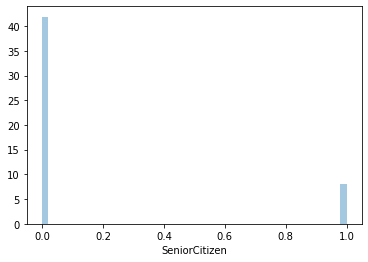

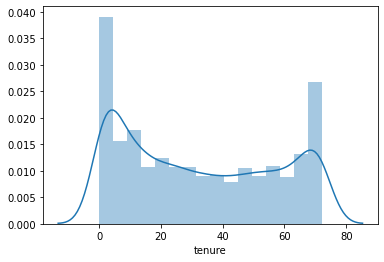

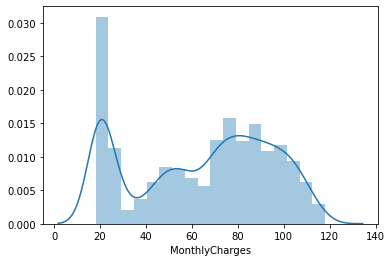

In [24]:
for i in num.columns:
    sns.distplot(num[i])
    plt.show()


### histogram

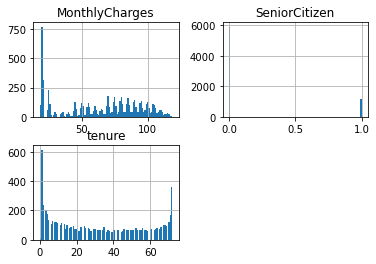

In [26]:
num.hist(bins=100)
plt.show()

### boxplot

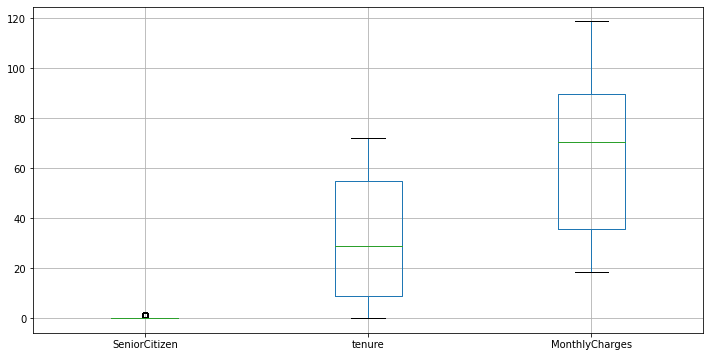

In [27]:
plt.figure(figsize=(12,6))
num.boxplot()
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


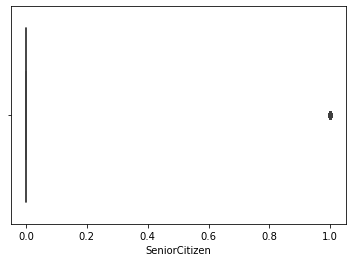

AxesSubplot(0.125,0.125;0.775x0.755)


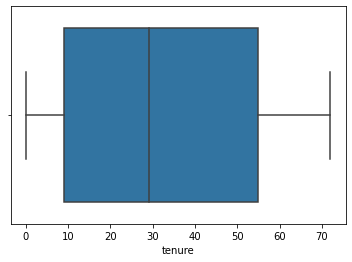

AxesSubplot(0.125,0.125;0.775x0.755)


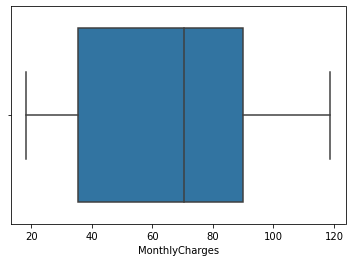

In [28]:
for i in num.columns:
    print(sns.boxplot(num[i]))
    plt.show()

## countplot

In [29]:
num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

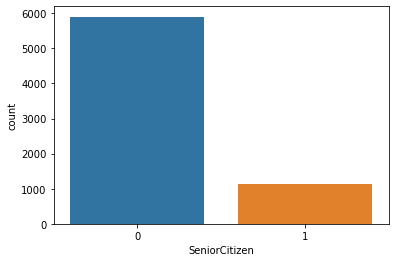

In [30]:
sns.countplot(df['SeniorCitizen'])

In [31]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### build a bar chart for internet services column

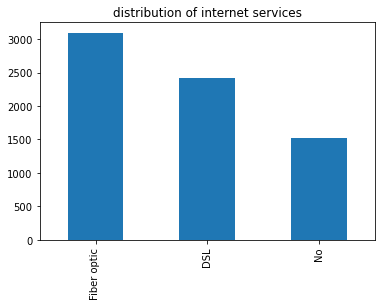

In [32]:
# build a bar chart for internet services column
df['InternetService'].value_counts().plot(kind='bar')
plt.title('distribution of internet services')
plt.show()

In [33]:
# or

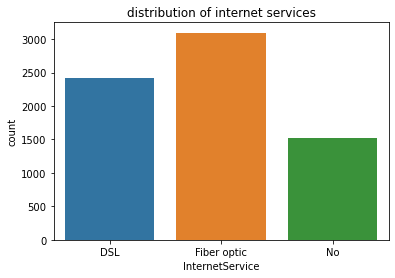

In [34]:
sns.countplot(df['InternetService'])
plt.title('distribution of internet services')
plt.show()

#### build a histogram for tenure column

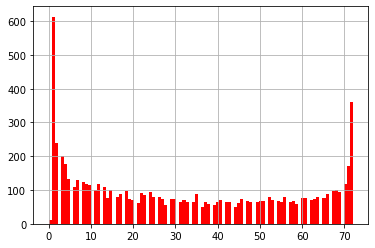

In [35]:
df['tenure'].hist(bins=100,color='r')
plt.show()

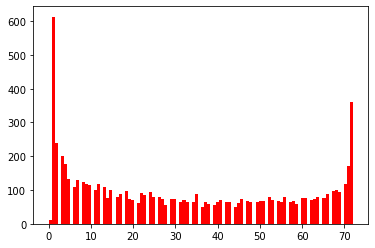

In [36]:
#or
plt.hist(df['tenure'],bins=100,color='r')
plt.show()
## 

### Bivariate analysis

In [37]:
num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

#### *scatterplot*

#### build a scatterplot for 'monthly charge' and 'tenure' for top 20 records

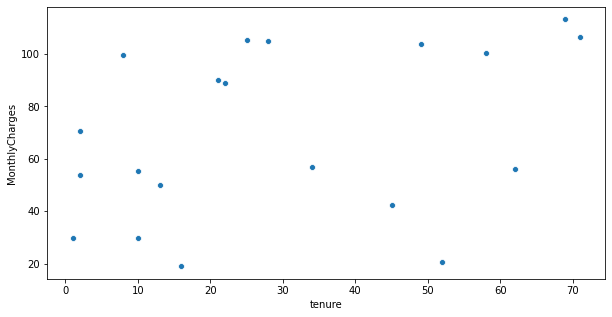

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['tenure'].head(20),df['MonthlyCharges'].head(20))
plt.show()

#### *crosstab(cat vs cat)*

In [39]:
cat.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

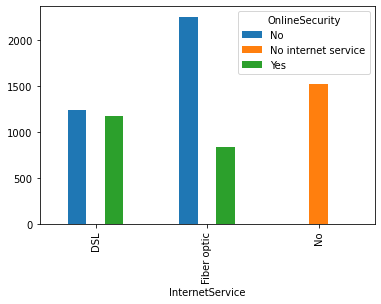

In [40]:
plt.figure(figsize=(10,8))
pd.crosstab(df['InternetService'],df['OnlineSecurity']).plot(kind='bar')
plt.show()
#DSL has high internet securit than optical fiber

<Figure size 720x576 with 0 Axes>

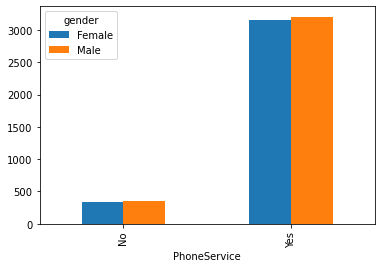

In [41]:
plt.figure(figsize=(10,8))
pd.crosstab(df['PhoneService'],df['gender']).plot(kind='bar')
plt.show()

#### *heatmap*

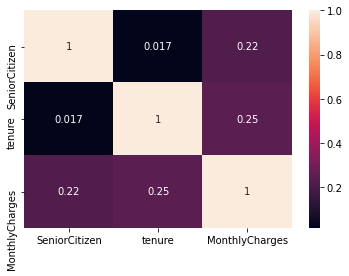

In [42]:
sns.heatmap(df.corr(),annot=True)
# senior citizen are -vely correlated with tenure
# monthelycharges are weakly +ve correlated with senior citize and tenure

#### *Boxplot*

#### build a box plot between tenure and contract(one col must be numeric if we use boxplot)

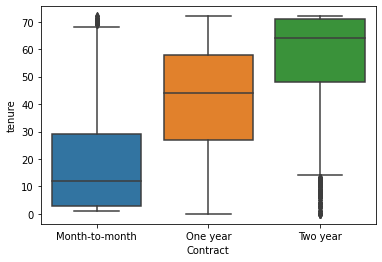

In [43]:
sns.boxplot(df['Contract'],df['tenure'])
plt.show()

# Statistics

In [44]:
num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [45]:
cat.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

### *(Que): does 'Contract' affects 'dependents'*

In [46]:
a = pd.crosstab(df['Dependents'],df['Contract'])
a

Contract    Month-to-month  One year  Two year
Dependents                                    
No                    3086       942       905
Yes                    789       531       790

#### step1 : identification of problem

In [47]:
# here we have cat vs cat columns and contract has more than 2 groups so we use chisquare test

#### step 2 : hypothesis formation

#### step 3: test statistics

In [48]:
# apply chisqaura

In [49]:
from scipy.stats import chi2_contingency 

In [50]:
tstats,pvalue,df,expected_frequency = chi2_contingency(a)
print('tstats:',tstats,'\n')
print('pvalue:',pvalue,'\n')
print('df:',df,'\n')
print('expected_frequency:',expected_frequency)

tstats: 420.0418172723388 

pvalue: 6.152877873541984e-92 

df: 2 

expected_frequency: [[2714.09555587 1031.70651711 1187.19792702]
 [1160.90444413  441.29348289  507.80207298]]


#### decision making

### **(Que): does 'monthlycharge' affects'gender'*

In [60]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [59]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

#### step 1 :identification of problem

In [53]:
#  here we have cat vs continuous column and catagorical col. has only 2 groups(male and female) so we apply 
# 2 sample mean test 

#### step 2: formation of null hypothesisi

#### step 3:identification of test

In [54]:
# we apply 2 sample independent t test because we have male and female(because test is conducted on different sample)

In [58]:
g1= df[df['gender']=='Male']['MonthlyCharges']
g2= df[df['gender']=='Female']['MonthlyCharges']

###### Test for normality

In [63]:
from scipy.stats import shapiro

In [64]:
tstas,pvalue = shapiro(g1)
print('pvalue:',pvalue)

pvalue: 7.152871959207456e-40


In [65]:
tstas,pvalue = shapiro(g2)
print('pvalue:',pvalue)

pvalue: 2.6111108947981122e-39


###### both the pvalue are less than .05 so it is not normally distributed .so, we use manwhitneyu

In [66]:
from scipy.stats import mannwhitneyu

In [67]:
tstats,pvalue = mannwhitneyu(g1,g2)
print('tstats:',tstats)
print('pvalue:',pvalue)

tstats: 6101575.5
pvalue: 0.12451372179207632


#### step 4 : Decision taken

In [68]:
#r p values>0.05 so we accept the null hypothesis

### *(Que): does 'gender' affects ''PhoneService'*

In [69]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [70]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [71]:
pd.crosstab(df['PhoneService'],df['gender'])

gender        Female  Male
PhoneService              
No               331   351
Yes             3157  3204

#### step 1 :identification of problem

In [72]:
# here we have cat vs cat column and both the catagories has only 2 groups so we use proportion_ztest

#### step 2 : null hypothesis formation

In [73]:
#h0 : male have no phoneservice = female have no phoneservices
#h1 : male have no phoneservice != female have no phoneservices

#### step 3 : identification of test

In [74]:
#  proportion_ztest

In [75]:
from statsmodels.stats.proportion import proportions_ztest

In [76]:
teststatistics,pvalue = proportions_ztest([331,351],[3488,3555])
print('teststatistics: ',teststatistics)
print('pvalue: ',pvalue)

teststatistics:  -0.5444622057476944
pvalue:  0.5861234494277743


#### step 4 : decision taken

In [77]:
# since p value > 0.05 hence accept null hypothesis

# *MODEL (Linear,Logistic)*

In [34]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### (A) build a linear regression mode where dependent variable is 'MonthlyCharges' and independent variable is                'tenure'
### (B)calculate MSE AND RMSE

In [61]:
X = df['tenure'].values
y = df['MonthlyCharges'].values

In [62]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)   
## if i dont do so it will throw an error that got 1-D array instead of 2-D array during the time of fitting of model

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.30,random_state=0)## random_state to get the fixed amount of data
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (4930, 1)
X_test: (2113, 1)
y_train: (4930, 1)
y_test: (2113, 1)


In [65]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train,y_train)

print('train_accuracy:',lin.score(X_train,y_train))

print('test_accuracy:',lin.score(X_test,y_test))

train_accuracy: 0.05771716656520964
test_accuracy: 0.069470028128085


#### MAE(it is a cost function which identify the abosolute difference B/W actual value a na predicted values)

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
y_pred = lin.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
print('MSE:',MSE)

MSE: 864.0415701364655


#### RMSE (it is a cost function which represent the standar deviation of the error that the system makes in its prediction)

In [68]:
RMSE = np.sqrt(MSE)
RMSE
# if my RMSE value was 10 or less than 10 than it was fine we can use that particular model but here RMSE is more than 10
#so we can not use that particular model

29.394584027273893

In [69]:
#################################################################

In [70]:
import statsmodels.api as sm

In [71]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     301.9
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.14e-65
Time:                        16:36:20   Log-Likelihood:                -23604.
No. Observations:                4930   AIC:                         4.721e+04
Df Residuals:                    4928   BIC:                         4.722e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.8830      0.414    156.820      0.0

### (B) Build a logistic regression model where dependent variable is 'churn' and independent variable is 'monthlycharges'

In [65]:
X = df['MonthlyCharges'].values
y = pd.get_dummies(df['Churn'],drop_first=True).values

In [66]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state = 0)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (4577, 1)
X_test: (2466, 1)
y_train: (4577, 1)
y_test: (2466, 1)


In [69]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train,y_train)

print('train_accuracy:',log.score(X_train,y_train))
print('test_accuracy:',log.score(X_test,y_test))

train_accuracy: 0.7338868254315054
test_accuracy: 0.7360097323600974


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [70]:
y_pred = log.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [71]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[1815    0]
 [ 651    0]]


In [72]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.metrics import classification_report

In [73]:
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print('f1_score_score:',f1_score(y_test,y_pred))

accuracy_score: 0.7360097323600974
precision_score: 0.0
recall_score: 0.0
f1_score_score: 0.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1815
           1       0.00      0.00      0.00       651

    accuracy                           0.74      2466
   macro avg       0.37      0.50      0.42      2466
weighted avg       0.54      0.74      0.62      2466



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
################################################################################################

#### ROC-AUC curve

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [77]:
pred_prob = log.predict_proba(X_test)

In [78]:
fpr,tpr,threshold = roc_curve(y_test,pred_prob[:,1])
print(auc(fpr,tpr))

0.6240223771015561


[]

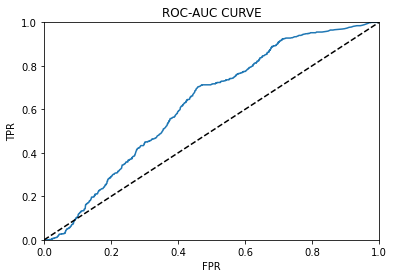

In [79]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC CURVE')
plt.plot()

In [80]:
#########################################################################

### (c) Build a multiple logistic regression model where dependent variable is 'churn' and independent variable is 'monthlycharges'and 'tenure'

In [81]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [82]:
df[['MonthlyCharges','tenure','Churn']].head()

MonthlyCharges  tenure Churn
0           29.85       1    No
1           56.95      34    No
2           53.85       2   Yes
3           42.30      45    No
4           70.70       2   Yes

In [83]:
X = df.loc[:,['MonthlyCharges','tenure']].values
y= pd.get_dummies(df['Churn'],drop_first=True).values

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 0)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (5634, 2)
X_test: (1409, 2)
y_train: (5634, 1)
y_test: (1409, 1)


In [85]:
from sklearn.linear_model import LogisticRegression

log1 = LogisticRegression()
log1.fit(X_train,y_train)

print('train_accuracy:',log1.score(X_train,y_train))
print('test_accuracy:',log1.score(X_test,y_test))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


train_accuracy: 0.7857649982250621
test_accuracy: 0.7735982966643009


In [86]:
y_pred = log1.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[934, 107],
       [212, 156]], dtype=int64)

In [88]:
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
from sklearn.metrics import classification_report

In [89]:
print('accuracy_score:',accuracy_score(y_test,y_pred),'\n')
print('precision_score:',precision_score(y_test,y_pred),'\n')
print('recall_score:',recall_score(y_test,y_pred),'\n')
print('f1_score_score:',f1_score(y_test,y_pred),'\n')
print('classification_report:','\n',classification_report(y_test,y_pred))

accuracy_score: 0.7735982966643009 

precision_score: 0.5931558935361216 

recall_score: 0.42391304347826086 

f1_score_score: 0.49445324881141045 

classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.85      1041
           1       0.59      0.42      0.49       368

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



####  ROC-AUC CURVE

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [91]:
pred_prob = log1.predict_proba(X_test)

In [92]:
fpr,tpr,threshold = roc_curve(y_test,pred_prob[:,1])

In [93]:
print(auc(fpr,tpr))

0.7859460489495886


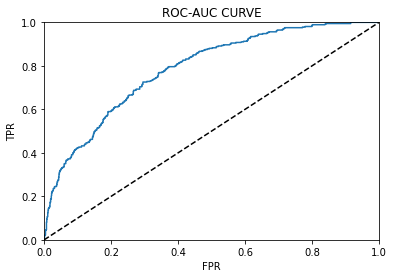

In [94]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC CURVE')
plt.show()

In [196]:
########

In [96]:
import statsmodels.api as sm

In [97]:
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train,X_train)
result = model.fit()
print(result.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5631
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 May 2021   Pseudo R-squ.:                     inf
Time:                        01:23:33   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7741      0.097    -18.319      0.000      -1.964      -1.584
x1             0.0332      0.001     22.767      0.000       0.030       0.036
x2            -0.0565      0.002    -29.537      0.0

### (D) Build a Random Forest model where dependent variable is 'churn' and independent variable is 'monthlycharges'and 'tenure'

In [210]:
df[['MonthlyCharges','tenure','Churn']].head()

MonthlyCharges  tenure Churn
0           29.85       1    No
1           56.95      34    No
2           53.85       2   Yes
3           42.30      45    No
4           70.70       2   Yes

In [211]:
X = df[['MonthlyCharges','tenure']].values
y= pd.get_dummies(df['Churn'],drop_first=True).values

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 0)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (4930, 2)
X_test: (2113, 2)
y_train: (4930, 1)
y_test: (2113, 1)


In [214]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

print('training accuracy:',rf.score(X_train,y_train))
print('training accuracy:',rf.score(X_test,y_test))

<ipython-input-214-1b07e9df84a3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


training accuracy: 0.9813387423935092
training accuracy: 0.7444391859914813


In [215]:
y_pred = rf.predict(X_test)

In [216]:
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score

from sklearn.metrics import classification_report

In [217]:
print('accuracy:',accuracy_score(y_test,y_pred),'\n')
print('precision_score:',precision_score(y_test,y_pred),'\n')
print('recall_score:',recall_score(y_test,y_pred),'\n')
print('f1_score_score:',f1_score(y_test,y_pred),'\n')
print('classification report:','\n',classification_report(y_test,y_pred))

accuracy: 0.7444391859914813 

precision_score: 0.5145413870246085 

recall_score: 0.4159132007233273 

f1_score_score: 0.46 

classification report: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      1560
           1       0.51      0.42      0.46       553

    accuracy                           0.74      2113
   macro avg       0.66      0.64      0.65      2113
weighted avg       0.73      0.74      0.74      2113



In [231]:
pd.DataFrame(([57.7717,69.9470],[73.38,73.60],[98.13,74.46]),columns=['training_score','test_score'],index=['linear_regression','logistic_regression','random_forest'])

training_score  test_score
linear_regression           57.7717      69.947
logistic_regression         73.3800      73.600
random_forest               98.1300      74.460

In [ ]:
#####################################################################################################################3

# *Modeling on full model (churn as our target variable)*

#### 'LOGISTIC REGRESSION' on FULL data

In [15]:
df.head(1)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Electronic check           29.85        29.85    No

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df1 = pd.get_dummies(df,drop_first=True)
df1.head()

SeniorCitizen  tenure  MonthlyCharges  customerID_0003-MKNFE  \
0              0       1           29.85                      0   
1              0      34           56.95                      0   
2              0       2           53.85                      0   
3              0      45           42.30                      0   
4              0       2           70.70                      0   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0015-UOCOJ  customerID_0016-QLJIS  customerID_0017-DINOC  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0017-IUDMW  customerID_0018-NYROU  customerID_0019-EFAEP  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0019-GFNTW  customerID_0020-INWCK  customerID_0020-JDNXP  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0021-IKXGC  customerID_0022-TCJCI  customerID_0023-HGHWL  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0023-UYUPN  customerID_0023-XUOPT  customerID_0027-KWYKW  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0030-FNXPP  customerID_0031-PVLZI  customerID_0032-PGELS  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0036-IHMOT  customerID_004

In [18]:
X = df1.drop(['Churn_Yes'],axis=1).values
y = df1['Churn_Yes'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 0)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (5634, 13601)
X_test: (1409, 13601)
y_train: (5634,)
y_test: (1409,)


In [21]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train)

print('train_accuracy:',lg.score(X_train,y_train))
print('test_accuracy:',lg.score(X_test,y_test))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train_accuracy: 0.8959886403975861
test_accuracy: 0.7849538679914834


In [22]:
y_pred = lg.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import classification_report

In [24]:
confusion_matrix(y_test,y_pred)

array([[924, 117],
       [186, 182]], dtype=int64)

In [25]:
print('accuracy:',accuracy_score(y_test,y_pred),'\n')
print('precision_score:',precision_score(y_test,y_pred),'\n')
print('recall_score:',recall_score(y_test,y_pred),'\n')
print('f1_score_score:',f1_score(y_test,y_pred),'\n')
print('classification report:','\n',classification_report(y_test,y_pred))

accuracy: 0.7849538679914834 

precision_score: 0.6086956521739131 

recall_score: 0.4945652173913043 

f1_score_score: 0.5457271364317842 

classification report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.49      0.55       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



#### ROC-AUC curve

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [27]:
pred_prob = lg.predict_proba(X_test)

In [28]:
fpr,tpr,threshold = roc_curve(y_test,pred_prob[:,1])

In [29]:
print('auc_score:',auc(fpr,tpr))

auc_score: 0.823359123752245


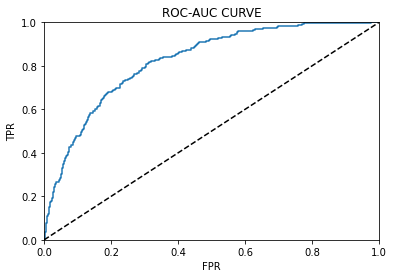

In [62]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC CURVE')
plt.show()

#### from the above model our 'Training Accuracy' > 'Testing Accuracy' so we can say that our model is working good on training data but poor generalization on testing data so there is OVERFITTING

#### 'DECISION TREE' on FULL data

In [30]:
X = df1.drop(['Churn_Yes'],axis=1).values
y = df1['Churn_Yes'].values

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (4930, 13601)
X_test: (2113, 13601)
y_train: (4930,)
y_test: (2113,)


In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini',)
dt.fit(X_train,y_train)

print('training_accuracy:',dt.score(X_train,y_train))
print('test_accuracy:',dt.score(X_test,y_test))

training_accuracy: 1.0
test_accuracy: 0.7671557027922385


In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report

In [34]:
y_pred = dt.predict(X_test)

In [35]:
confusion_matrix(y_test,y_pred)

array([[1356,  204],
       [ 288,  265]], dtype=int64)

In [36]:
print('accuracy:',accuracy_score(y_test,y_pred),'\n')
print('precision_score:',precision_score(y_test,y_pred),'\n')
print('recall_score:',recall_score(y_test,y_pred),'\n')
print('f1_score_score:',f1_score(y_test,y_pred),'\n')
print('classification report:','\n',classification_report(y_test,y_pred))

accuracy: 0.7671557027922385 

precision_score: 0.5650319829424307 

recall_score: 0.47920433996383366 

f1_score_score: 0.518590998043053 

classification report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1560
           1       0.57      0.48      0.52       553

    accuracy                           0.77      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



#### ROC-AUC CURVE

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [38]:
pred_prob = dt.predict_proba(X_test)

In [40]:
fpr,tpr,threshold = roc_curve(y_test,pred_prob[:,1])

In [42]:
print('auc_score:',auc(fpr,tpr))

auc_score: 0.6742175545973015


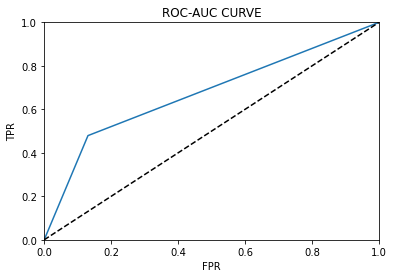

In [44]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC-AUC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
#######################

### Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(dt,X_train,y_train,cv=5)

print(cv)

[0.77789047 0.77890467 0.76166329 0.76572008 0.77383367]


In [48]:
cv.mean()

0.7716024340770791

In [49]:
cv.std()

0.006800427835391574

In [50]:
# the result is: 0.0068 which is 0.6% This is extremely low, which means that our model has a very low variance, 
# which is actually very good since that means that the prediction that we obtained on one test set is not by chance.

# there is no sampling bais

### TUNNING(Grid-Search CV)

In [56]:
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,13]}

 
gs = GridSearchCV(dt,params,scoring='accuracy',cv=5)
#the 'scoring' parameter takes the' performance metrics'


gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
             scoring='accuracy')

In [57]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 5}

### apply those parametres on model

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
dt.fit(X_train,y_train)

print('training_accuracy:',dt.score(X_train,y_train))
print('test_accuracy:',dt.score(X_test,y_test))

training_accuracy: 0.797971602434077
test_accuracy: 0.783719829626124


In [ ]:
#######################

In [98]:
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Electronic check           29.85        29.85    No  
1               No      Mailed check           56.95       1889.5    No  
2              Yes      Mailed check           53.85       108.15   Yes

In [ ]:
nominal(get_dummies) = cust_id,gender,partner,dependent,phone services,multiplelines,onlinesecurity,onlinebackup,

In [ ]:
ordinal = internet services